<a href="https://colab.research.google.com/github/Mingmmz/CSE579-UW/blob/main/CSE_579_HW1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Preparation

In [ ]:
# Perform git clone as follows

#TODO CHANGE THIS TO THE RIGHT REPO
!git clone https://github.com/WEIRDLabUW/CSE-579-HW1.git
!cp -r CSE-579-HW1/* .

# The `files` tab will be like
# - sample_data (this one is default in colab)
# - utils.py
# - policy.py
# - evaluate.py
# - pytorch_utils.py
# - data
#    - reacher_expert_data.pkl
#    - reacher_expert_policy.pkl
#    - pointmaze_expert_data.pkl
# - resources
#    - mjkey.txt
# - reach_goal/envs
#    - point.xml
#    - pointmaze_env.py
#    - pointmaze_expert.py

# !NOTE!: Once you are done, copy your implementation of bc, dagger and
# autoregressive policies in the notebook here back to the python script
# when submiting your code

Cloning into 'CSE-579-HW1'...
remote: Enumerating objects: 45, done.
remote: Counting objects: 100% (45/45), done.
remote: Compressing objects: 100% (41/41), done.
remote: Total 45 (delta 9), reused 33 (delta 2), pack-reused 0 (from 0)
Receiving objects: 100% (45/45), 30.17 MiB | 15.67 MiB/s, done.
Resolving deltas: 100% (9/9), done.


In [ ]:
!apt-get install -y \
    libgl1-mesa-dev \
    libgl1-mesa-glx \
    libglew-dev \
    libosmesa6-dev \
    software-properties-common

!apt-get install -y patchelf
!pip install setuptools wheel
!pip install gym==0.26.2
!pip install gymnasium
!pip install gymnasium-robotics[mujoco-py]
!pip install gym-notices==0.0.8
!pip install matplotlib
!pip install mujoco
!pip install free-mujoco-py
!pip install pybullet
! pip install tqdm diffusers
import os
os.environ['LD_PRELOAD']=':/usr/lib/x86_64-linux-gnu/libGLEW.so'

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
software-properties-common is already the newest version (0.99.22.9).
The following additional packages will be installed:
  libegl-dev libgl-dev libgles-dev libgles1 libglu1-mesa libglu1-mesa-dev libglvnd-core-dev
  libglvnd-dev libglx-dev libopengl-dev libosmesa6
The following NEW packages will be installed:
  libegl-dev libgl-dev libgl1-mesa-dev libgl1-mesa-glx libgles-dev libgles1 libglew-dev
  libglu1-mesa libglu1-mesa-dev libglvnd-core-dev libglvnd-dev libglx-dev libopengl-dev libosmesa6
  libosmesa6-dev
0 upgraded, 15 newly installed, 0 to remove and 49 not upgraded.
Need to get 4,020 kB of archives.
After this operation, 19.4 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/main amd64 libglx-dev amd64 1.4.0-1 [14.1 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/main amd64 libgl-dev amd64 1.4.0-1 [101 kB]
Get:3 http://archive.ubuntu.com/ubuntu 

In [ ]:
# Test whether mujoco and gym is correctly installed
# You are expected to get an output of `(11, )`
import gym
import mujoco_py
# WARN: The environment Reacher-v2 is out of date. You should consider upgrading to version `v4`.
# env = gym.make("Reacher-v2")
env = gym.make("Reacher-v4")
print(env.reset()[0].shape)

Compiling /usr/local/lib/python3.10/dist-packages/mujoco_py/cymj.pyx because it changed.
[1/1] Cythonizing /usr/local/lib/python3.10/dist-packages/mujoco_py/cymj.pyx


INFO:root:running build_ext
INFO:root:building 'mujoco_py.cymj' extension
INFO:root:creating /usr/local/lib/python3.10/dist-packages/mujoco_py/generated/_pyxbld_2.0.2.13_310_linuxcpuextensionbuilder/temp.linux-x86_64-cpython-310/usr/local/lib/python3.10/dist-packages/mujoco_py
INFO:root:creating /usr/local/lib/python3.10/dist-packages/mujoco_py/generated/_pyxbld_2.0.2.13_310_linuxcpuextensionbuilder/temp.linux-x86_64-cpython-310/usr/local/lib/python3.10/dist-packages/mujoco_py/gl
INFO:root:x86_64-linux-gnu-gcc -Wno-unused-result -Wsign-compare -DNDEBUG -g -fwrapv -O2 -Wall -g -fstack-protector-strong -Wformat -Werror=format-security -g -fwrapv -O2 -fPIC -I/usr/local/lib/python3.10/dist-packages/mujoco_py -I/usr/local/lib/python3.10/dist-packages/mujoco_py/binaries/linux/mujoco210/include -I/usr/local/lib/python3.10/dist-packages/numpy/core/include -I/usr/include/python3.10 -c /usr/local/lib/python3.10/dist-packages/mujoco_py/cymj.c -o /usr/local/lib/python3.10/dist-packages/mujoco_py/g

(11,)


In [ ]:
%load_ext autoreload
%autoreload 2
import torch
import torch.optim as optim
import numpy as np
from utils import rollout, relabel_action
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

INFO:numexpr.utils:NumExpr defaulting to 2 threads.


cuda:0


In [ ]:
# import pickle
# with open('data/pointmaze_expert_data.pkl', 'rb') as f:
#     data = pickle.load(f)

# print(data)
import matplotlib.pyplot as plt

# BC

In [ ]:
"""
TODO: MODIFY TO FILL IN YOUR BC IMPLEMENTATION
"""
def simulate_policy_bc(env, policy, expert_data, num_epochs=500, episode_length=50,
                       batch_size=32):

    # Fill in your BC implementation in this function.

    # Hint: Just flatten your expert dataset and use standard pytorch supervised learning code to train the policy.

    optimizer = optim.Adam(list(policy.parameters()), lr=1e-4)
    idxs = np.array(range(len(expert_data)))
    num_batches = len(idxs)*episode_length // batch_size
    losses = []

    for epoch in range(num_epochs):
        np.random.shuffle(idxs)
        running_loss = 0.0

        # Flatten expert data
        flattened_expert = {'observations': [], 'actions': []}

        for i in idxs:
          for key in flattened_expert.keys():
            flattened_expert[key].append(expert_data[i][key])

        for key in flattened_expert.keys():
            flattened_expert[key] = np.concatenate(flattened_expert[key], axis=0)

        if flattened_expert['observations'].size > 0 and flattened_expert['actions'].size > 0:
            expert_obs = torch.tensor(flattened_expert['observations'], dtype=torch.float32)
            expert_action = torch.tensor(flattened_expert['actions'], dtype=torch.float32)

        for i in range(num_batches):
            optimizer.zero_grad()
            # TODO start: Fill in your behavior cloning implementation here, just maximize log likelihood!
            # training set
            train_obs = expert_obs[i * batch_size : (i+1) * batch_size].to(device)
            train_action = expert_action[i * batch_size : (i+1) * batch_size].to(device)

            if train_obs.size(0) == 0:
              continue

            # Sample action from the policy distribution
            log_prob_action = policy.log_prob(train_obs, train_action)  # Sample action and get log probability

            #  Compute loss: maximum log likelihood
            loss = - log_prob_action.mean()

            # TODO end
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
        # if epoch % 10 == 0:
        # print('[%d] loss: %.8f' %
        #     (epoch, running_loss / 10.))
        print('[%d] loss: %.8f' %
            (epoch, running_loss / num_batches))
        # losses.append(loss.item())
        losses.append(running_loss / num_batches)

    # Plot loss
    plt.figure(figsize=(10, 5))
    plt.plot(losses, label='Loss', color='blue')
    plt.title('Loss During Training')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid()
    plt.show()

# DAgger

In [ ]:
"""
TODO: MODIFY TO FILL IN YOUR DAGGER IMPLEMENTATION
"""
def simulate_policy_dagger(env, policy, expert_paths, expert_policy=None, num_epochs=500, episode_length=50,
                            batch_size=32, num_dagger_iters=10, num_trajs_per_dagger=10):

    # Fill in your dagger implementation in this function.

    # Hint: Loop through num_dagger_iters iterations, at each iteration train a policy on the current dataset.
    # Then rollout the policy, use relabel_action to relabel the actions along the trajectory with "expert_policy" and then add this to current dataset
    # Repeat this so the dataset grows with states drawn from the policy, and relabeled actions using the expert.

    # Optimizer code
    optimizer = optim.Adam(list(policy.parameters()))
    losses = []
    returns = []

    trajs = expert_paths

    # Dagger iterations
    for dagger_itr in range(num_dagger_iters):
        idxs = np.array(range(len(trajs)))
        num_batches = len(idxs)*episode_length // batch_size
        # Train the model with Adam
        for epoch in range(num_epochs):
            running_loss = 0.0
            np.random.shuffle(idxs)

            # Flatten expert data
            flattened_expert = {'observations': [], 'actions': []}

            for i in idxs:
              for key in flattened_expert.keys():
                flattened_expert[key].append(trajs[i][key])

            for key in flattened_expert.keys():
                flattened_expert[key] = np.concatenate(flattened_expert[key], axis=0)

            if flattened_expert['observations'].size > 0 and flattened_expert['actions'].size > 0:
                expert_obs = torch.tensor(flattened_expert['observations'], dtype=torch.float32)
                expert_action = torch.tensor(flattened_expert['actions'], dtype=torch.float32)

            for i in range(num_batches):
                optimizer.zero_grad()
                # TODO start: Fill in your standard behavior cloning implementation here
                train_obs = expert_obs[i * batch_size : (i+1) * batch_size].to(device)
                train_action = expert_action[i * batch_size : (i+1) * batch_size].to(device)

                if train_obs.size(0) == 0:
                  continue

                # Sample action from the policy distribution
                log_prob_action = policy.log_prob(train_obs, train_action)  # Sample action and get log probability

                #  Compute loss: maximum log likelihood
                loss = - log_prob_action.mean()

                # TODO end
                loss.backward()
                optimizer.step()

                # print statistics
                running_loss += loss.item()
            # if epoch % 10 == 0:
            print('[%d, %5d] loss: %.8f' %(epoch + 1, i + 1, running_loss / num_batches))
            # losses.append(loss.item())
            losses.append(running_loss / num_batches)

        # Collecting more data for dagger
        trajs_recent = []
        for k in range(num_trajs_per_dagger):
            env.reset()
            # TODO start: Rollout the policy on the environment to collect more data, relabel them,
            #             and then add them into trajs_recent
            trajectory = rollout(env = env, agent = policy, agent_name = "dagger", episode_length=episode_length)
            trajectory_re = relabel_action(trajectory, expert_policy)
            trajs_recent.append(trajectory_re)
            # TODO end

        trajs += trajs_recent
        mean_return = np.mean(np.array([traj['rewards'].sum() for traj in trajs_recent]))
        print("Average DAgger return is " + str(mean_return))
        returns.append(mean_return)

    # Plot loss
    plt.figure(figsize=(10, 5))
    plt.plot(losses, label='Loss', color='blue')
    plt.ylim(min(losses), max(losses))
    plt.title('Loss During Training')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid()
    plt.show()

# Preparation2

In [ ]:
import torch
import torch.nn as nn

import math
import copy
import numpy as np
import pickle
import matplotlib.pyplot as plt
import torch.nn.functional as F
from torch import distributions as pyd
import torch.optim as optim
from torch.distributions import Categorical
from utils import PolicyGaussian, mlp
from diffusers import DDPMScheduler, get_scheduler, EMAModel
from policy import torchify_dict, ConditionalUnet1D, Policy, BaseDiffusionDataset, create_sample_indices, get_data_stats, normalize_data, unnormalize_data
from typing import Any, Dict, Optional
import collections
from tqdm.auto import tqdm
from DiffusionPolicy import DiffusionDataset


device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")




# Autoregressive

In [ ]:
"""
TODO: MODIFY TO FILL IN YOUR AUTOREGRESSIVE POLICY IMPLEMENTATION
"""
class PolicyAutoRegressiveModel(nn.Module):
    def __init__(self, num_inputs, num_outputs, hidden_dim=65, hidden_depth=2, num_buckets=10, ac_low=-1, ac_high=1):
        super(PolicyAutoRegressiveModel, self).__init__()
        self.eps = 1e-8
        self.trunks = nn.ModuleList([mlp(num_inputs, hidden_dim, num_buckets, hidden_depth)] \
                        + [mlp(num_inputs + j + 1, hidden_dim, num_buckets, hidden_depth) for j in range(num_outputs - 1)])
        self.num_dims = num_outputs
        self.ac_low = torch.tensor(ac_low).to(device)
        self.ac_high = torch.tensor(ac_high).to(device)
        self.num_buckets = num_buckets
        self.bucket_size = torch.tensor((ac_high - ac_low) / num_buckets).to(device)

    def discretize(self, ac):
        bucket_idx = (ac - self.ac_low) // (self.bucket_size + self.eps)
        return torch.clip(bucket_idx, 0, self.num_buckets - 1)

    def undiscretize(self, bucket_idx, dimension):
        return_val = bucket_idx[:, None]*self.bucket_size + self.ac_low + self.bucket_size*0.5
        return return_val[:, dimension]

    def forward(self, state):
        vals = []
        log_probs = 0
        action_d = []
        for j in range(self.num_dims):
            #========== TODO: start ==========
            # Here, we want to predict each action one dimension at a time.
            # For each action dimension j, concatenate state with all the previous action dimensions (0...j-1), pass it through
            # the respective MLP (i.e. self.trunks[j]) to get a logit. Use the logit to create a categorical distribution (torch.Categorical).
            # Sample from this distribution and get that sample's log probability. Add the log probability
            # to the running log_probs and undiscretize the sample add append it to vals.
            # Important - use previous *sampled* actions
            # continue # TODO: Remove this when running
            if j == 0:
                input_j = state
            else:
                input_j = torch.cat([state, torch.tensor(action_d).reshape(1,j).to(device)], dim=-1)  # Concatenate state with previous actions
            logit = self.trunks[j](input_j)
            cate_dist = torch.distributions.Categorical(logits=logit)
            cate_dist_sample = cate_dist.sample()
            log_prob = cate_dist.log_prob(cate_dist_sample)
            log_probs += log_prob
            action_d.append(cate_dist_sample)
            vals.append(self.undiscretize(cate_dist_sample, j))
            #========== TODO: end ==========
        vals = torch.cat(vals, dim=-1)
        return vals, log_probs

    def log_prob(self, state, action):
        log_prob = 0.
        ac_discretized = self.discretize(action)
        for j in range(self.num_dims):
            #========== TODO: start ==========
            # Here, want to get log prob of action given state under the current autoregressive model.
            # For each action dimension j, concatenate state with all the previous action dimensions (0...j-1), pass it through
            # the respective MLP (i.e. self.trunks[j]) to get a logit. Use the logit to create a categorical distribution.
            # Get the log prob of the respective discretized action (i.e. ac_discretized[:, j]) and add it to the running log_prob.
            # Important - use previous actions from the action variable, *not* sampled actions
            # continue # TODO: Remove this when running
            if j == 0:
              input_j = state
            else:
              input_j = torch.cat([state, ac_discretized[:, :j]], dim=-1)

            logit = self.trunks[j](input_j)
            cate_dist = torch.distributions.Categorical(logits=logit)
            log_prob_disc = cate_dist.log_prob(ac_discretized[:, j])
            log_prob += log_prob_disc
            #========== TODO: end ==========

        return log_prob

# Diffusion Extra Credit:

In [ ]:
class DiffusionPolicy(Policy):
    def __init__(self, obs_size: int, obs_horizon: int, action_size: int, action_pred_horizon: int , action_horizon: int, num_diffusion_iters=100, device: torch.device=torch.device('cuda')):

        self.net = ConditionalUnet1D(action_size, obs_size * obs_horizon ).to(device) #down_dims=[32, 64, 128]
        self.noise_scheduler = DDPMScheduler(
                num_train_timesteps=num_diffusion_iters,
                # the choise of beta schedule has big impact on performance
                # we found squared cosine works the best
                beta_schedule='squaredcos_cap_v2',
                # clip output to [-1,1] to improve stability
                clip_sample=True,
                # our network predicts noise (instead of denoised action)
                prediction_type='epsilon'
            )

        self.obs_horizon = obs_horizon
        self.device = device
        self.action_size = action_size
        self.obs_deque = collections.deque([], maxlen=self.obs_horizon)
        self.num_diffusion_iters = num_diffusion_iters
        self.action_horizon = action_horizon
        self.action_pred_horizon = action_pred_horizon
        # need to be set later
        self.stats = None

    def set_stats(self, stats):
        self.stats = torchify_dict(stats, self.device)

    @torch.no_grad()
    def _process_obs(self, obs:  np.ndarray) -> Dict[str, torch.Tensor]:
        ret = {}
        obs = np.copy(obs)
        ret["state"] = torch.as_tensor(
            obs, dtype=torch.float32, device=self.device)
        return ret

    def reset(self) -> None:
        self.obs_deque.clear()

    def add_obs(self, obs: np.ndarray) -> None:
        o = self._process_obs(obs)
        self.obs_deque.append(o)
        while len(self.obs_deque) < self.obs_horizon:
            self.obs_deque.append(o)

    def __call__(self,  obs: Optional[np.ndarray] = None) -> Any:
        return self.get_action(obs.squeeze() if obs is not None else None)

    @torch.no_grad()
    def get_action(self, obs: Optional[np.ndarray] = None) -> np.ndarray:
        """
        Takes dict with "embed" and "state" possibly as keys, and returns actions.
        actions is a (H, D) array, where H is the action horizon and D is action dimension.
        """
        assert self.stats, "Need to call set_data_stats before calling get_action which are the normalization paramaters"
        if obs is not None:
            self.add_obs(obs)
        assert len(self.obs_deque) == self.obs_horizon
        states = torch.stack([x["state"] for x in self.obs_deque])
        #========== TODO: start ==========
        # normalize the states to feed into the policy. For this use the self.stats dictionary and
        # the normalize_data function.

        # reshape the states to be the correct shape to pass into the policy network.

        # initialize action from Gaussian noise
        naction = np.zeros(1) # TODO fill this in

        #========== TODO: end ==========
        # init the DDPM scheduler
        self.noise_scheduler.set_timesteps(
            self.num_diffusion_iters)

        for k in self.noise_scheduler.timesteps:
            #========== TODO: start ==========
            # Run one single iterative denoising step on the naction.abs
            # Use the self.net to predict the noise based on the timestep k


            # run the inverse diffusion step using the noise_scheduler.step function. See https://huggingface.co/docs/diffusers/en/api/schedulers/ddpm
            # for more information on the noise_scheduler.step function.
            pass
            #========== TODO: end ==========

        # normalized action ouptut should be batchsize, pred_horizon, action_dimention
        # (B, pred_horizon, action_dim)
        naction = naction[0]
        action_pred: torch.Tensor = unnormalize_data(
            naction, stats=self.stats['action'])

        start = self.obs_horizon - 1
        end = start + self.action_horizon
        action = action_pred[start:end, :]

        return action, {}

    def state_dict(self):
        return dict(net=self.net.state_dict(),
                    stats=self.stats )

    def load_state_dict(self, state_dict) -> None:
        self.net.load_state_dict(state_dict["net"])
        self.set_stats(state_dict["stats"])


def train_diffusion_policy(policy: DiffusionPolicy, expert_data, num_epochs=500, batch_size=32):
    # Diffusion Training Function
    dataset = DiffusionDataset(expert_data, pred_horizon=policy.action_pred_horizon, obs_horizon=policy.obs_horizon, action_horizon=policy.action_horizon)
    policy.set_stats(dataset.stats)
    print(policy.action_horizon, policy.obs_horizon, policy.action_pred_horizon)
    ema = EMAModel(
        parameters=policy.net.parameters(),
        power=0.75)
    print(dataset.stats)
    data_loader = torch.utils.data.DataLoader(dataset, batch_size=batch_size, shuffle=True, num_workers=4, pin_memory=True, persistent_workers=True)
    optimizer = torch.optim.AdamW(policy.net.parameters(), lr=1e-4, weight_decay=1e-6)
    lr_scheduler = get_scheduler(
        name='cosine',
        optimizer=optimizer,
        num_warmup_steps=(len(data_loader) * num_epochs) // 10,
        num_training_steps=len(data_loader) * num_epochs
    )
    losses = []


    for epoch in tqdm(range(num_epochs)):
        running_loss = 0.0
        with tqdm(data_loader, leave=False) as tepoch:
            for batch in tepoch:
                # normalized action and state from batch
                naction = batch['action'].to(policy.device)
                nagent_pos = batch['state'][:, :policy.obs_horizon].to(policy.device)
                #========== TODO: begin ==========

                # first reshape the conditioning to fit into the policy by flattening it.
                # Then sample noise to add to the actions.

                # Code provided to sample a diffusion iteration for each data point. For more information about the noise
                # scheduler, see https://arxiv.org/pdf/2006.11239
                timesteps = torch.randint(
                    0, policy.noise_scheduler.config.num_train_timesteps,
                    (B,), device=policy.device
                ).long()

                # Use the policy.noise_scheduler to add noise to the normalized actions based on the sampled
                # noise and time steps


                # predict the noise residual using self.net


                # Calculate the loss between the predicted and actual noise


                #========== TODO: end ==========
                # optimize
                optimizer.zero_grad()
                loss.backward()
                optimizer.step()

                # step lr scheduler every batch
                # this is different from standard pytorch behavior
                lr_scheduler.step()

                # update Exponential Moving Average of the model weights
                ema.step(policy.net.parameters())

                # logging
                loss_cpu = loss.item()
                running_loss += loss_cpu
                tepoch.set_postfix(loss=loss_cpu)
        losses.append(running_loss / len(data_loader))
        print(running_loss/ len(data_loader))

    # set the final weights to the EMA
    ema_model = policy.net
    ema.copy_to(ema_model.parameters())
    policy.net = ema_model
    return policy


# Evaluation:

In [ ]:
class Args:
    def __init__(self, env, train, policy, test, render=False):
        self.env = env # 'reacher' or 'pointmaze'
        self.train = train # 'behavior_cloning' or 'dagger' or 'diffusion'
        self.policy = policy # 'gaussian' or 'autoregressive' or 'diffusion'
        self.test = test # whether test only
        self.render = render # whether to render during test
# DC
# args = Args('reacher', 'behavior_cloning', 'gaussian', False)
# args = Args('pointmaze', 'behavior_cloning', 'gaussian', False)

# DAgger
args = Args('reacher', 'dagger', 'gaussian', False)
# args = Args('pointmaze', 'dagger', 'gaussian', False)

# Autoregressive
# args = Args('pointmaze', 'behavior_cloning', 'autoregressive', False)
# args = Args('pointmaze', 'dagger', 'autoregressive', False)

# Diffusion
#args = Args('pointmaze', 'diffusion', 'diffusioin', False)

using device cuda
Imported Expert data successfully
Expert policy loaded
[1,     9] loss: 1.39223136
[2,     9] loss: 0.59131544
[3,     9] loss: -0.34408180
[4,     9] loss: 0.94737650
[5,     9] loss: 5.55911857
[6,     9] loss: 0.92624239
[7,     9] loss: 0.17088468
[8,     9] loss: -0.04497902
[9,     9] loss: -0.13281350
[10,     9] loss: -0.22274698


<ipython-input-35-ce121ea0e0bf>:99: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  expert_policy = torch.load('data/reacher_expert_policy.pkl', map_location=torch.device(devi

[11,     9] loss: -0.33231739
[12,     9] loss: -0.50246108
[13,     9] loss: -0.70172883
[14,     9] loss: 1.27024173
[15,     9] loss: -0.15955136
[16,     9] loss: -0.54206837
[17,     9] loss: -0.56728385
[18,     9] loss: -0.74053687
[19,     9] loss: -0.93215063
[20,     9] loss: -1.19159345
[21,     9] loss: -1.30798333
[22,     9] loss: -1.27974510
[23,     9] loss: -0.73372849
[24,     9] loss: -1.33699340
[25,     9] loss: -1.20391334
[26,     9] loss: -1.57041984
[27,     9] loss: -1.50966222
[28,     9] loss: -1.75117452
[29,     9] loss: -1.72362196
[30,     9] loss: -2.02362124
[31,     9] loss: -2.21685237
[32,     9] loss: -2.40281018
[33,     9] loss: -2.69912039
[34,     9] loss: -2.67735481
[35,     9] loss: -2.66825530
[36,     9] loss: -2.72636724
[37,     9] loss: -2.64887081
[38,     9] loss: -1.03654724
[39,     9] loss: -0.71898166
[40,     9] loss: -2.11518147
[41,     9] loss: -2.11905691
[42,     9] loss: -2.24428999
[43,     9] loss: -2.48731846
[44,     9]

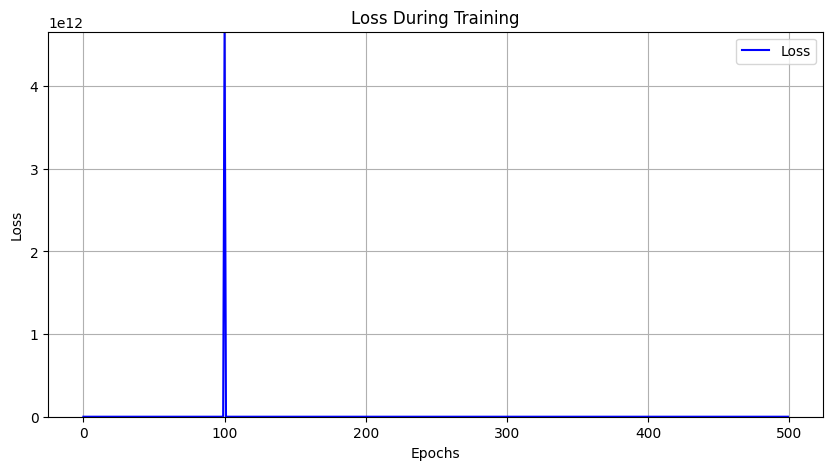

In [ ]:
import gym
import numpy as np
import time
import matplotlib.pyplot as plt
import torch
import argparse

from utils import generate_paths, get_expert_data

# from bc import simulate_policy_bc
# from dagger import simulate_policy_dagger
import pytorch_utils as ptu
from evaluate import evaluate
from reach_goal.envs.pointmaze_env import PointMazeEnv
from reach_goal.envs.pointmaze_expert import WaypointController

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('using device', device)

torch.manual_seed(0)
import random
random.seed(0)
np.random.seed(0)

if __name__ == '__main__':

    # Get the expert data
    if args.env == 'reacher':
        file_path = 'data/reacher_expert_data.pkl'
    elif args.env == 'pointmaze':
        file_path = 'data/pointmaze_expert_data.pkl'
    else:
        raise ValueError('Invalid environment')
    expert_data = get_expert_data(file_path)

    flattened_expert = {'observations': [],
                        'actions': []}

    for expert_path in expert_data:
        for k in flattened_expert.keys():
            flattened_expert[k].append(expert_path[k])

    for k in flattened_expert.keys():
        flattened_expert[k] = np.concatenate(flattened_expert[k])

    # Define environment
    if args.env == 'reacher':
        # env = gym.make("Reacher-v2", render_mode='human' if args.render else None)
        env = gym.make("Reacher-v4", render_mode='human' if args.render else None)
    elif args.env == 'pointmaze':
        env = PointMazeEnv(render_mode='human' if args.render else 'rgb_array')
    else:
        raise ValueError('Invalid environment')

    # Define policy
    hidden_dim = 128
    hidden_depth = 2
    obs_size = env.observation_space.shape[0]
    ac_size = env.action_space.shape[0]
    ac_margin = 0.1

    if args.policy == 'gaussian':
        policy = PolicyGaussian(num_inputs=obs_size, num_outputs=ac_size, hidden_dim=hidden_dim, hidden_depth=hidden_depth)
        policy.to(device)
    elif args.policy == 'autoregressive':
        num_buckets = 10
        policy = PolicyAutoRegressiveModel(num_inputs=obs_size, num_outputs=ac_size, hidden_dim=hidden_dim,
                                            hidden_depth=hidden_depth, num_buckets=num_buckets,
                                            ac_low=flattened_expert['actions'].min(axis=0) - ac_margin,
                                            ac_high=flattened_expert['actions'].max(axis=0) + ac_margin)
        policy.to(device)
    elif args.policy == "diffusion":
        policy = DiffusionPolicy(obs_size=obs_size, obs_horizon=4, action_size=ac_size, action_horizon=8, action_pred_horizon=12, num_diffusion_iters=100, device=device)


    # Training hyperparameters
    if args.env == 'reacher':
        episode_length = 60
        num_epochs = 500
        batch_size = 32
        # batch_size = 32
    elif args.env == 'pointmaze':
        episode_length = 300
        num_epochs = 10
        batch_size = 128
        if args.train == "diffusion":
            num_epochs = 1
    else:
        raise ValueError('Invalid environment')

    if not args.test:
        if args.train == 'behavior_cloning':
            # Train behavior cloning
            simulate_policy_bc(env, policy, expert_data, num_epochs=num_epochs, episode_length=episode_length,
                            batch_size=batch_size)
        elif args.train == 'dagger':
            if args.env == 'reacher':
                # Load interactive expert
                expert_policy = torch.load('data/reacher_expert_policy.pkl', map_location=torch.device(device))
                print("Expert policy loaded")
                expert_policy.to(device)
                # ptu.set_gpu_mode(True)
                ptu.set_gpu_mode(torch.cuda.is_available())
            elif args.env == 'pointmaze':
                expert_policy = WaypointController(env.maze)
            else:
                raise ValueError('Invalid environment')

            num_dagger_iters=10
            num_epochs = int(num_epochs/num_dagger_iters)
            num_trajs_per_dagger=10

            simulate_policy_dagger(env, policy, expert_data, expert_policy, num_epochs=num_epochs, episode_length=episode_length,
                            batch_size=batch_size, num_dagger_iters=num_dagger_iters, num_trajs_per_dagger=num_trajs_per_dagger)
        elif args.train == "diffusion" and args.env == "pointmaze":
            policy = train_diffusion_policy(policy, expert_data, num_epochs=num_epochs, batch_size=batch_size)
        else:
            raise ValueError('Invalid training method')
        torch.save(policy.state_dict(), f'{args.policy}_{args.env}_{args.train}_final.pth')
    else:
        policy.load_state_dict(torch.load(f'{args.policy}_{args.env}_{args.train}_final.pth'))


In [ ]:
from evaluate import evaluate
evaluate(env, policy, args.train, num_validation_runs=100, episode_length=episode_length, render=args.render, env_name=args.env)

test 0, success True, reward -8.242767746109376
test 1, success True, reward -6.386651320372687
test 2, success True, reward -5.099521799142738
test 3, success True, reward -4.174798518737988
test 4, success True, reward -5.800921655669728
test 5, success True, reward -5.155843880341803
test 6, success True, reward -5.09593788300949
test 7, success True, reward -4.053841933659412
test 8, success True, reward -2.006192044644871
test 9, success True, reward -5.441009667463514
test 10, success True, reward -3.738712131675049
test 11, success True, reward -4.2644948112708345
test 12, success True, reward -4.141069574379296
test 13, success True, reward -8.57770430760249
test 14, success True, reward -2.1063646341883944
test 15, success True, reward -6.00241049634069
test 16, success True, reward -3.555415806421963
test 17, success True, reward -5.120914850134369
test 18, success True, reward -6.13164874053918
test 19, success False, reward -11.558033802528723
test 20, success True, reward 

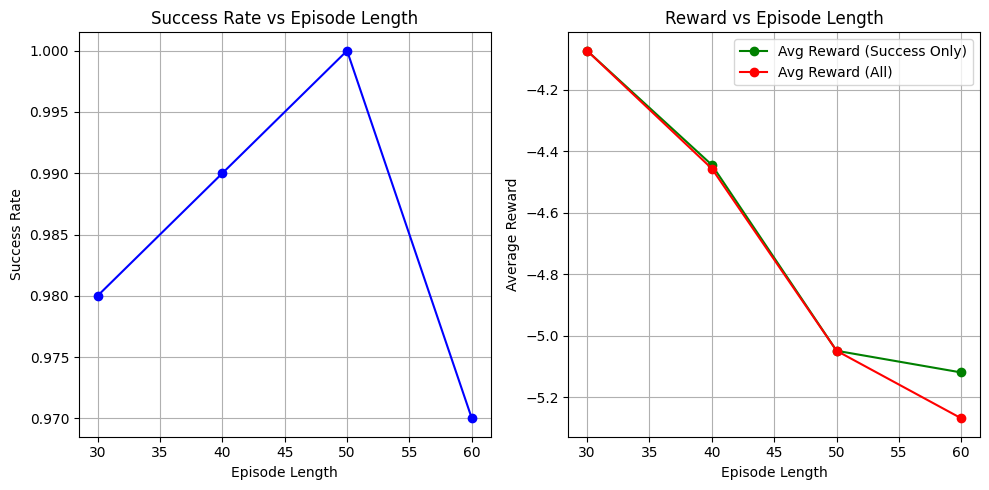

In [ ]:
import matplotlib.pyplot as plt

# Example data: Replace with your actual success rates and rewards for different batch sizes
batch_sizes = [30, 40, 50, 60]
success_rates = [0.98, 0.99, 1.0, 0.97]
avg_reward_success = [-4.073625026981839, -4.444705336207585, -5.0487030320045765, -5.11924679164976]
avg_reward_all = [-4.073625026981839, -4.456709939266821, -5.0487030320045765, -5.268315981252017]

# Plot success rate vs batch size
plt.figure(figsize=(10, 5))

# Plot success rate
plt.subplot(1, 2, 1)
plt.plot(batch_sizes, success_rates, label='Success Rate', marker='o', color='blue')
plt.title('Success Rate vs Episode Length')
plt.xlabel('Episode Length')
plt.ylabel('Success Rate')
plt.grid(True)

# Plot average reward vs batch size
plt.subplot(1, 2, 2)
plt.plot(batch_sizes, avg_reward_success, label='Avg Reward (Success Only)', marker='o', color='green')
plt.plot(batch_sizes, avg_reward_all, label='Avg Reward (All)', marker='o', color='red')
plt.title('Reward vs Episode Length')
plt.xlabel('Episode Length')
plt.ylabel('Average Reward')
plt.legend()
plt.grid(True)

# Show plots
plt.tight_layout()
plt.show()


In [ ]:
# Download zip file
!zip -r /content/CSE-579-HW1.zip /content/CSE-579-HW1

  adding: content/CSE-579-HW1/ (stored 0%)
  adding: content/CSE-579-HW1/main.py (deflated 71%)
  adding: content/CSE-579-HW1/policy.py (deflated 78%)
  adding: content/CSE-579-HW1/reach_goal/ (stored 0%)
  adding: content/CSE-579-HW1/reach_goal/envs/ (stored 0%)
  adding: content/CSE-579-HW1/reach_goal/envs/pointmaze_env.py (deflated 76%)
  adding: content/CSE-579-HW1/reach_goal/envs/point.xml (deflated 58%)
  adding: content/CSE-579-HW1/reach_goal/envs/reacher_env_mujoco.py (deflated 63%)
  adding: content/CSE-579-HW1/reach_goal/envs/pointmaze_expert.py (deflated 70%)
  adding: content/CSE-579-HW1/reach_goal/envs/__init__.py (deflated 5%)
  adding: content/CSE-579-HW1/reach_goal/envs/point_mass_env.py (deflated 66%)
  adding: content/CSE-579-HW1/reach_goal/__init__.py (deflated 23%)
  adding: content/CSE-579-HW1/reach_goal/resources/ (stored 0%)
  adding: content/CSE-579-HW1/reach_goal/resources/point_mass.py (deflated 60%)
  adding: content/CSE-579-HW1/reach_goal/resources/goal.py (

In [ ]:
from google.colab import files
files.download("/content/CSE-579-HW1.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>